<a href="https://colab.research.google.com/github/Rutuza/Coding-Blocks-practice-questions/blob/main/WineQualityPrediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #used to find the accuracy of model


2. Uploading required dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/WineQT.csv")

In [ ]:
##checking rows and columns
df.shape

(1143, 13)

In [ ]:
##checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
##head gives upper details of dataset whereas df.tail() gives lower details of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.tail() ##give last rows details

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


3. Data analysis and visualisation


In [ ]:
#statistical measures of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
print('Number of features in dataset: ', df.shape[1])
print('number of instances in dataset: ', df.shape[0])

Number of features in dataset:  13
number of instances in dataset:  1143


In [ ]:
print('no. of duplicate rows: ', df.duplicated().sum())

no. of duplicate rows:  0


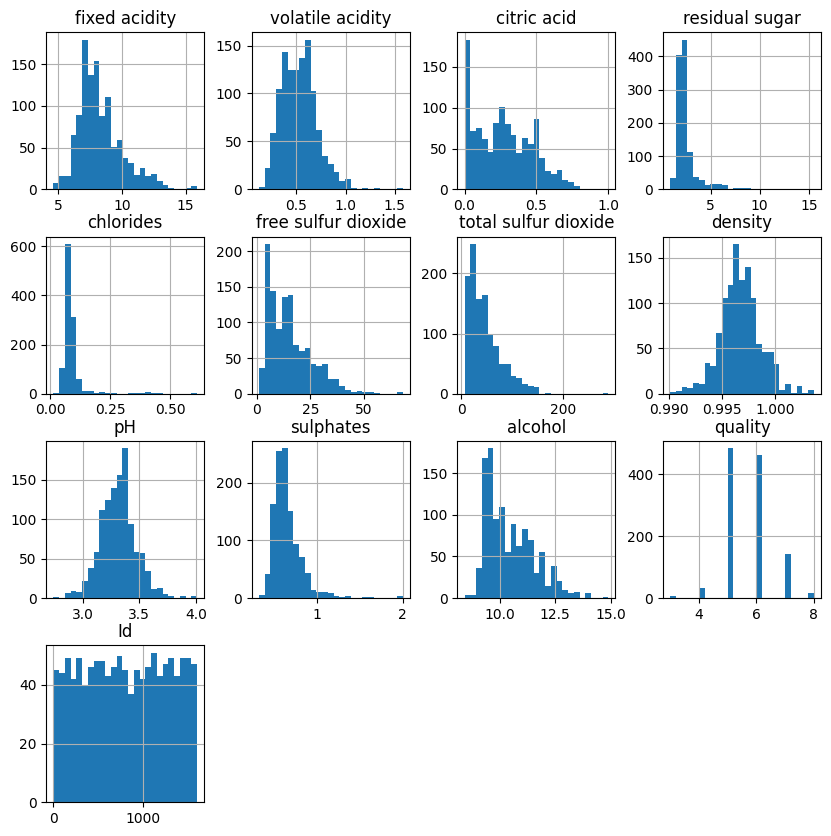

In [ ]:
df.hist(bins=25, figsize=(10,10))
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

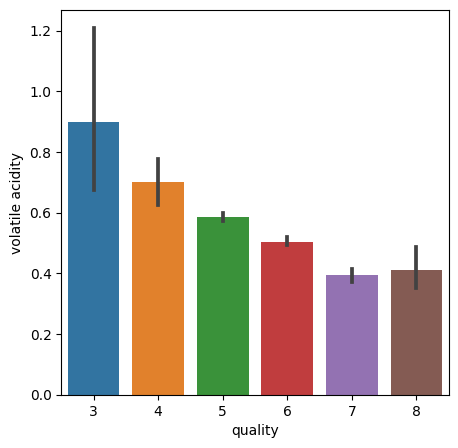

In [ ]:
## visualizong individual histogram of each
# if the quality is 7 or 8 that means the quality of wine is good and if it is less that means it is underrated
fig = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

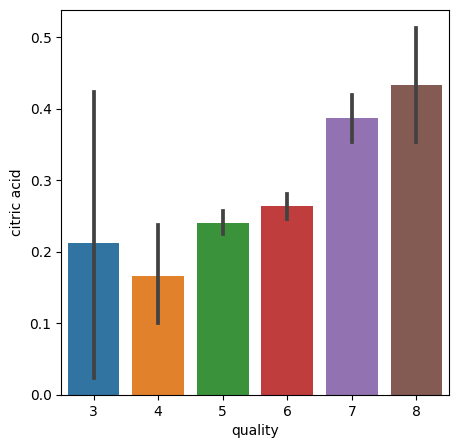

In [ ]:
#citric acid in directly proportional to quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='citric acid', data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

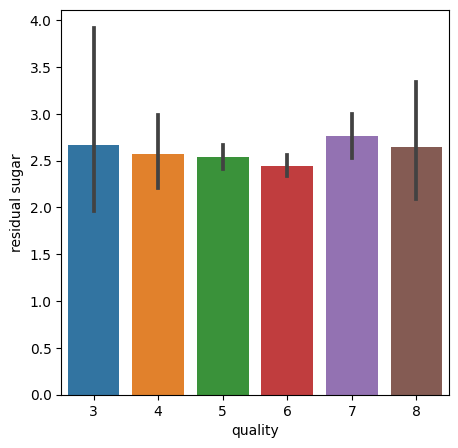

In [ ]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='residual sugar', data = df)
#if the

<Axes: xlabel='quality', ylabel='chlorides'>

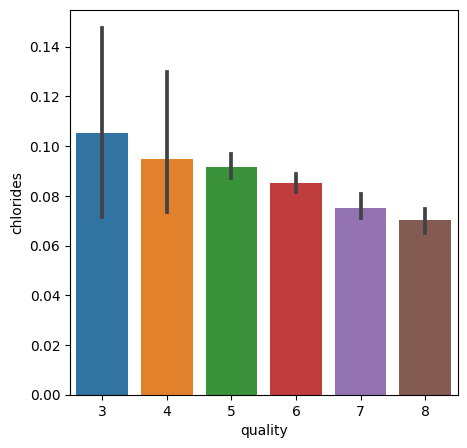

In [ ]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

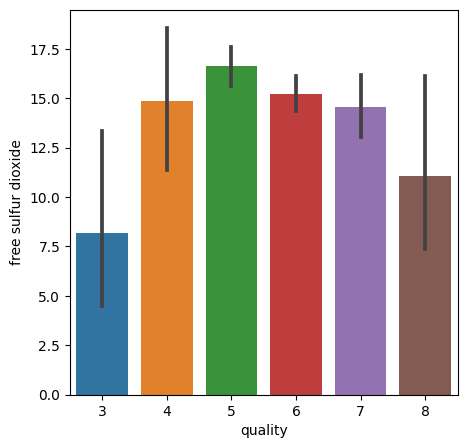

In [ ]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

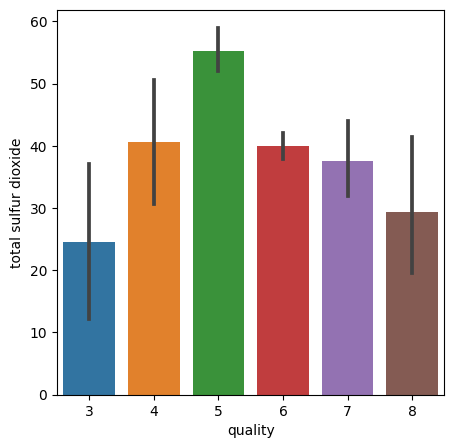

In [ ]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='pH'>

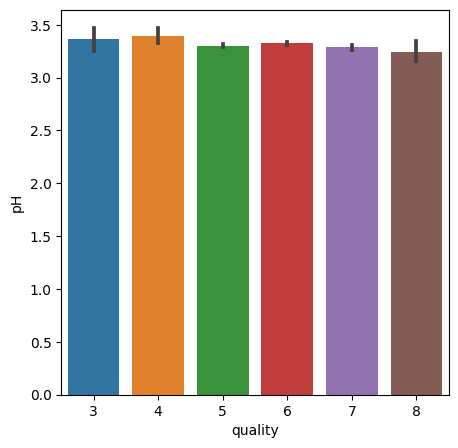

In [ ]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='pH', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

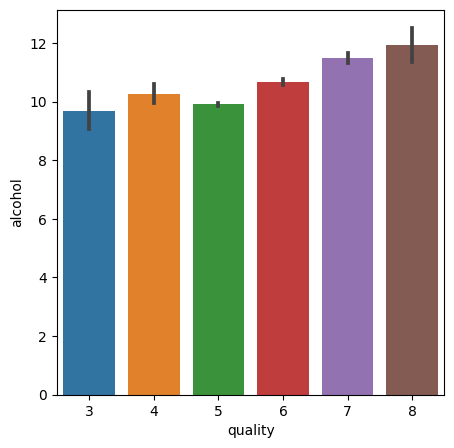

In [ ]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='alcohol', data = df)

4. Checking null values

In [ ]:
df.isnull().sum() ## Since, there are no null values so no need to worry

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Correlation matrix

<Axes: >

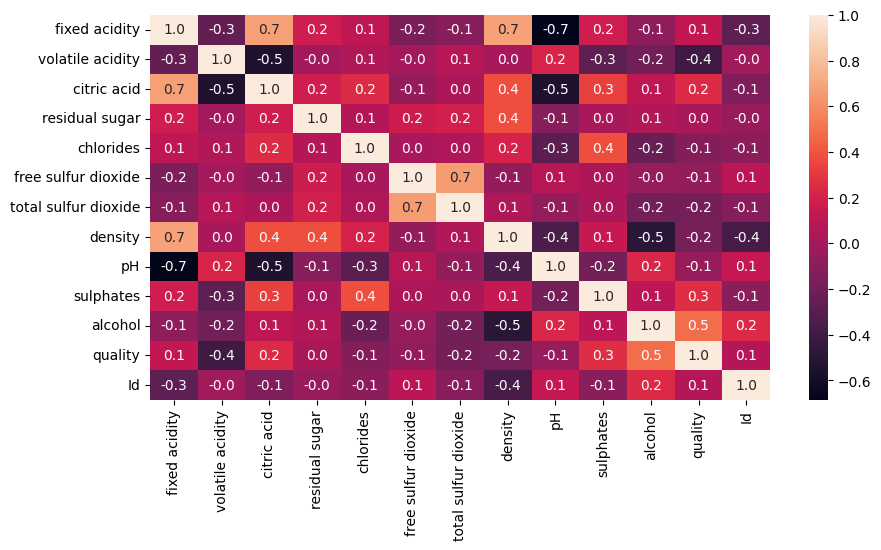

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt='0.1f')

Binarization of target variable

In [ ]:
# df['quality'].unique()
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [ ]:
# df['quality'] = [1 if x>=7 else 0 for x in df['quality']]
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [ ]:
df['quality'] = label_quality.fit_transform(df['quality'])
# df['quality'].unique() # 0 means bad quality of wine and 1 means good quality of wine

Not Handling Imbalanced data

In [ ]:
df['quality'].value_counts()

0    984
1    159
Name: quality, dtype: int64

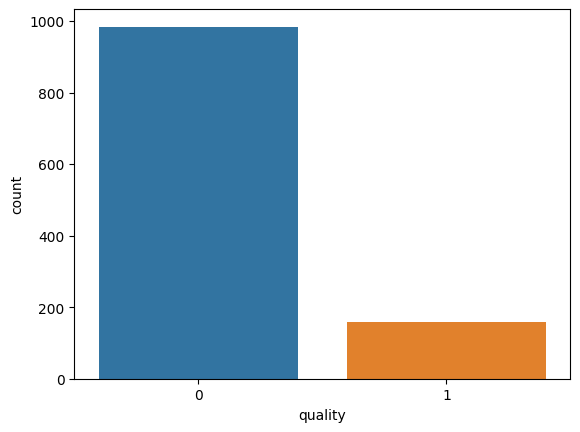

In [ ]:
sns.countplot(x ='quality', data = df)
plt.show()

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [ ]:
print(y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


Applying models

Random forest classifier

In [ ]:
#RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
X_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



Model Evaluation
Accuracy Score

In [ ]:
#accuracy on test data
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy: ',test_data_accuracy)

Accuracy:  1.0


In [ ]:
print(confusion_matrix(Y_test, X_test_pred))

[[229]]


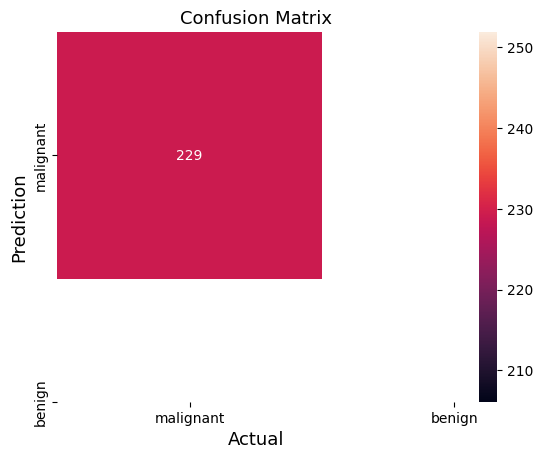

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=13)
plt.show()